In [5]:
import pandas as pd
file_path = 'gdb-2021-full-dataset.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
data.head()


C:\Users\Zsolti\AppData\Local\Temp\ipykernel_22284\230653616.py:3: DtypeWarning: Columns (2,4,5,7,8,10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,iso3,country,pillar,module,indicator_id,indicator_name,indicator_type,variable_name,question,hierarchy_level,...,score,parent,row_order,question_order,wip,wib,wim,regional_hub,un_region,barometer_region
0,XKX,Kosovo,Governance,GOVERNANCE,G.GOVERNANCE.DPL,Governance (G): Data protection,Primary,G.GOVERNANCE.DPL,"To what extent do relevant laws, regulations, ...",1,...,72.0,G.GOVERNANCE.DPL,0.0,50948.0,0.1,0.03,0.2,Open Data Kosovo,Southern Europe,Eastern Europe and Central Asia
1,XKX,Kosovo,Governance,GOVERNANCE,G.GOVERNANCE.DPL,Governance (G): Data protection,Primary,G.GOVERNANCE.DPL,"To what extent do relevant laws, regulations, ...",1,...,NaN,G.GOVERNANCE.DPL,1.0,50948.0,0.1,0.03,0.2,Open Data Kosovo,Southern Europe,Eastern Europe and Central Asia
2,XKX,Kosovo,Governance,GOVERNANCE,G.GOVERNANCE.DPL,Governance (G): Data protection,Primary,G.GOVERNANCE.DPL.a,Existence,2,...,1.0,G.GOVERNANCE.DPL,0.0,50949.0,0.1,0.03,0.2,Open Data Kosovo,Southern Europe,Eastern Europe and Central Asia
3,XKX,Kosovo,Governance,GOVERNANCE,G.GOVERNANCE.DPL,Governance (G): Data protection,Primary,G.GOVERNANCE.DPL.a.EXISTS,What is the nature of the framework?,4,...,NaN,G.GOVERNANCE.DPL.a,0.0,50950.0,0.1,0.03,0.2,Open Data Kosovo,Southern Europe,Eastern Europe and Central Asia
4,XKX,Kosovo,Governance,GOVERNANCE,G.GOVERNANCE.DPL,Governance (G): Data protection,Primary,G.GOVERNANCE.DPL.a.EXISTS,2;Please identify the framework(s) you have as...,4,...,NaN,G.GOVERNANCE.DPL.a,2.1,50950.0,0.1,0.03,0.2,Open Data Kosovo,Southern Europe,Eastern Europe and Central Asia


In [6]:
# Filtering the dataset for Slovakia
slovakia_data = data[data['country'] == 'Slovakia']

# Overview of Slovakia's data
slovakia_overview = slovakia_data.describe(include='all')

# Displaying the first few rows of Slovakia's data for a closer look
slovakia_sample = slovakia_data.head()

slovakia_overview, slovakia_sample


(        iso3   country        pillar               module      indicator_id  \
 count   1311      1311          1301                 1305              1297   
 unique     1         1             4                    9                54   
 top      SVK  Slovakia  Availability  POLITICAL INTEGRITY  A.PF.BUDGETSPEND   
 freq    1311      1311           709                  362                62   
 mean     NaN       NaN           NaN                  NaN               NaN   
 std      NaN       NaN           NaN                  NaN               NaN   
 min      NaN       NaN           NaN                  NaN               NaN   
 25%      NaN       NaN           NaN                  NaN               NaN   
 50%      NaN       NaN           NaN                  NaN               NaN   
 75%      NaN       NaN           NaN                  NaN               NaN   
 max      NaN       NaN           NaN                  NaN               NaN   
 
                                   ind

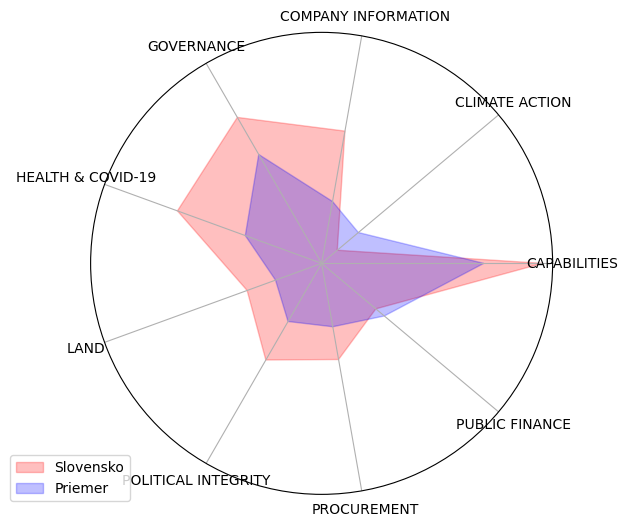

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
# Correct approach: Identify the available modules in the dataset for Slovakia
slovakia_modules = slovakia_data['module'].unique()

# Calculate the average scores for those modules across all countries
average_scores_modules = data[data['module'].isin(slovakia_modules)].groupby('module')['score'].mean().reset_index()

# Merge the Slovakia data with the calculated averages
slovakia_comparison_modules = slovakia_data.merge(average_scores_modules, on='module', how='left', suffixes=('_slovakia', '_average'))

# For the radar chart, we will use the average score for Slovakia and compare it with the overall average for each module
radar_chart_data_modules = slovakia_comparison_modules.groupby('module')[['score_slovakia', 'score_average']].mean().reset_index()

# Now we will create the radar chart with the corrected module data
# Getting the data for the radar chart
labels_modules = np.array(radar_chart_data_modules['module'])
stats_slovakia_modules = radar_chart_data_modules['score_slovakia'].values
stats_average_modules = radar_chart_data_modules['score_average'].values

# Number of variables we're plotting.
num_vars_modules = len(labels_modules)

# Split the circle into even parts and save the angles so we know where to put each axis.
angles_modules = np.linspace(0, 2 * np.pi, num_vars_modules, endpoint=False).tolist()

# The plot is made circular, so we need to "complete the loop" and append the start to the end.
stats_slovakia_modules = np.concatenate((stats_slovakia_modules, [stats_slovakia_modules[0]]))
stats_average_modules = np.concatenate((stats_average_modules, [stats_average_modules[0]]))
angles_modules += angles_modules[:1]

# Draw the radar chart for the corrected module data
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles_modules, stats_slovakia_modules, color='red', alpha=0.25)
ax.fill(angles_modules, stats_average_modules, color='blue', alpha=0.25)

# Draw one axe per variable and add labels
ax.set_xticks(angles_modules[:-1])
ax.set_xticklabels(labels_modules)

# Remove the y-axis labels to clean up the plot.
ax.yaxis.set_visible(False)

# Add legend
ax.legend(['Slovensko', 'Priemer'], loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Show the plot
plt.show()


In [11]:
import pandas as pd
import numpy as np

# Load the dataset
file_path = 'gdb-2021-full-dataset.csv'
dataset = pd.read_csv(file_path)

# Get unique modules for Slovakia after dropping NaN values
slovakia_modules = dataset[dataset['country'] == 'Slovakia']['module'].dropna().unique()

# Calculate the mean scores for Slovakia for the modules
slovakia_module_scores = dataset[dataset['country'] == 'Slovakia'].groupby('module')['score'].mean()[slovakia_modules]

# Calculate the mean scores across all countries for the same modules
average_module_scores = dataset[dataset['module'].isin(slovakia_modules)].groupby('module')['score'].mean()

# Create a DataFrame with the available modules for Slovakia and the corresponding average scores
slovakia_modules_table = pd.DataFrame({
    'Module': slovakia_modules,
    'Slovakia Score': slovakia_module_scores.values,
    'Average Score': average_module_scores.reindex(slovakia_modules).values
})

slovakia_modules_table.reset_index(drop=True, inplace=True)

slovakia_modules_table


C:\Users\Zsolti\AppData\Local\Temp\ipykernel_22284\1012336228.py:6: DtypeWarning: Columns (2,4,5,7,8,10,11,16) have mixed types. Specify dtype option on import or set low_memory=False.
  dataset = pd.read_csv(file_path)


,Module,Slovakia Score,Average Score
0,GOVERNANCE,19.226562,14.343512
1,CAPABILITIES,25.207875,18.502510
2,COMPANY INFORMATION,15.320619,7.169354
3,LAND,9.041516,5.594404
4,POLITICAL INTEGRITY,12.729338,7.657902
5,PUBLIC FINANCE,8.077784,9.338808
6,PROCUREMENT,11.137860,7.343278
7,CLIMATE ACTION,2.333532,5.473568
8,HEALTH & COVID-19,17.501826,9.263162
